In [154]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [232]:
#### Very Basic Monte Carlo Simulation


# Get our stocks
def get_simulation(ticker, name):
    data = pd.DataFrame()
    data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-01-01')['Adj Close']
    
    log_returns = np.log(1+ data.pct_change())
    
    u = log_returns.mean()
    
    var = log_returns.var()
    
    drift = u - (0.5 * var) 
    stdev = log_returns.std()
    
    time = 365
    loops = 10000
    
    daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(time, loops)))
    
    S0 = data.iloc[-1]
    
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    
    for t in range(1, time):
        price_list[t] = price_list[t - 1] * daily_returns[t]
        
    # Create our averages for our normal distribution
    endsim_prices = price_list[-1]
    movingavg = [np.mean(price_list)]
    endmean = endsim_prices.mean()
    endsigma = endsim_prices.std()
    stdevs1 = [(endmean + endsigma), (endmean - endsigma)]
    stdevs2 = [(endmean + (endsigma*2)), (endmean - (endsigma*2))]
    
    # Our histogram of ending prices after simulation
    plt.figure(figsize=(10,8))
    plt.xlabel('{} Stock Price'.format(name))
    plt.ylabel('Probability Density')
    plt.hist(endsim_prices, 50, density=True, color='c', edgecolor='k')
    # Our average of the ending prices
    plt.axvline(endmean, color='r', linestyle='dashed', linewidth=2, label='Avg. Price {}'.format(round(endmean, 2)))
    plt.axvline(stdevs1[0], color='r', linestyle='dashed', linewidth=2, label='One Standard Deviation')
    plt.axvline(stdevs1[1], color='r', linestyle='dashed', linewidth=2, label='One Standard Deviation')
    plt.legend()
    
    
    
    # Monte Carlo Simulation
    plt.figure(figsize=(10,8))
    plt.title('Monte Carlo 1 Year '+ name)
    plt.ylabel("price {$}")
    plt.xlabel('Time {Days}')
    # Plot our price list
    plt.plot(price_list)
    # Create our average line
    plt.axhline(endmean)
    
    plt.show()
    print(stdevs1[0], stdevs1[1])
    

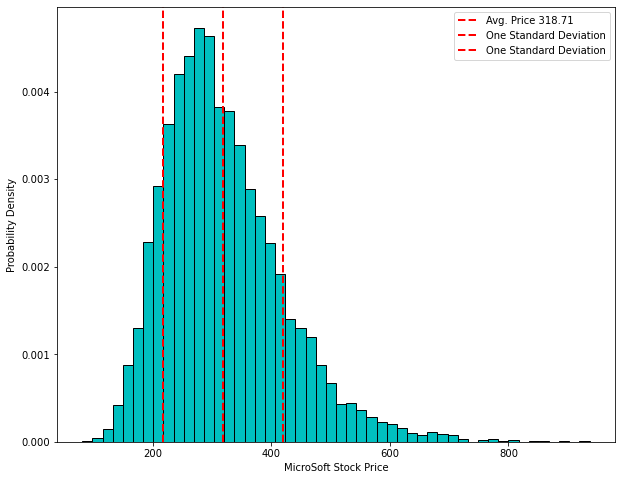

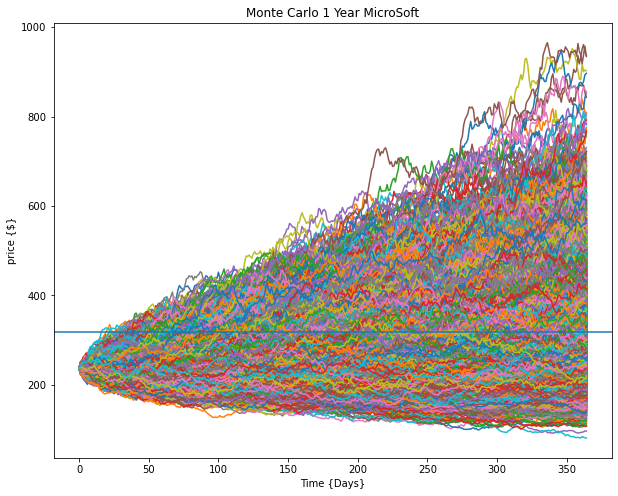

419.8631172784602 217.55256347179952


In [233]:
get_simulation('MSFT', 'MicroSoft')